<a href="https://colab.research.google.com/github/owenrichards10/CMP7005---Programming-for-Data-Analysis---Assessment/blob/main/CMP7005_Programming_for_Data_Analysis_Assessment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **CMP7005 - Programming for Data Analysis - Assessment**

**Why I chose this research question**

For this project, I chose to analyse India’s air-quality data because air pollution has become one of the country’s most significant public health and environmental challenges over the past decade. Cities across India consistently rank among the most polluted globally, and understanding how pollutant levels change over time is essential for informing policy, public awareness, and urban planning.

The dataset includes daily measurements of main pollutants (PM2.5, PM10, NOx gases, CO, SO₂, O₃), volatile organic compounds (benzene, toluene, xylene), and AQI results from 2015 to 2020. This makes it an excellent resource for researching seasonal variations, long-term trends, and the connections between air quality and contaminants.

**This research is important for several reasons:**

**Public Health Impact**

Respiratory and cardiovascular diseases are directly linked to high levels of harmful gases and particulate matter, particularly PM2.5 and PM10. Understanding pollutant patterns can help identify periods or locations with elevated risk.

**Environmental and Policy Relevance**

Government initiatives such as the National Clean Air Programme (NCAP) aim to reduce pollution levels, but assessing their effectiveness requires data-driven insights. This dataset allows investigation into whether air quality improved or deteriorated over time.

**Urban and Industrial Growth**

Many Indian cities have undergone rapid industrialisation and urban expansion between 2015–2020, potentially affecting pollutant emissions. This makes the question relevant for understanding how human activity influences air quality.

**Predictive and Analytical Value**

With AQI data included, this dataset provides an opportunity to explore whether pollutant concentrations can reliably predict air-quality outcomes, which is valuable for forecasting models and early warning systems.

**The aim of my analysis is to generate meaningful insights into India’s air-quality trends and pollutant behaviour.**

**Identify Trends**

How pollutant levels changed from 2015–2020 across different cities.

Whether certain pollutants show seasonal or long-term patterns.

**Understand Relationships Between Pollutants**

How pollutants (e.g., PM2.5, PM10, NOx, VOCs) correlate with one another.

Which pollutants most strongly influence the Air Quality Index (AQI).

**Explore Geographic Variation**

Which cities consistently experience poor air quality.

How urban vs industrial regions differ in pollutant composition.

**Predict Air Quality**

Whether machine-learning models can accurately predict AQI or AQI categories from raw pollutant data.

Which features contribute most to accurate predictions.

# Importing the required libraries

In [ ]:
# Importing the necessary libraries
import pandas as pd
import numpy as np
import os
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt

# Mounting the drive

In [ ]:
# Loading the Drive helper and mount
from google.colab import drive

# This will prompt for authorisation.
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Change the path according to the location of the data
%cd '/content/drive/MyDrive/Prog Data Analysis Assessment'

/content/drive/MyDrive/Prog Data Analysis Assessment


In [ ]:
%ls # Shows all the content of the folder

Ahmedabad_data.csv       Chennai_data.csv     Kochi_data.csv
Aizawl_data.csv          Coimbatore_data.csv  Kolkata_data.csv
all_cities_combined.csv  Delhi_data.csv       Lucknow_data.csv
Amaravati_data.csv       Ernakulam_data.csv   Mumbai_data.csv
Amritsar_data.csv        Gurugram_data.csv    Patna_data.csv
Bengaluru_data.csv       Guwahati_data.csv    Shillong_data.csv
Bhopal_data.csv          Hyderabad_data.csv   Talcher_data.csv
Brajrajnagar_data.csv    Jaipur_data.csv      Thiruvananthapuram_data.csv
Chandigarh_data.csv      Jorapokhar_data.csv  Visakhapatnam_data.csv


# Merging of the csv files:

In [ ]:
drive_path = '/content/drive/MyDrive/Prog Data Analysis Assessment'

To enable comprehensive analysis, I am first merging all of the separate CSV files into one unified dataset. This combined dataset will allow me to apply the same cleaning, preprocessing, and modelling steps across all observations.

In [ ]:
dataframes = []
for filename in os.listdir(drive_path):
    if filename.endswith('.csv'):  # Check if the file is a CSV file
        file_path = os.path.join(drive_path, filename)
        df = pd.read_csv(file_path)  # Read the CSV file into a DataFrame
        dataframes.append(df)  # Add the DataFrame to the list

# Data Understanding


In [ ]:
# Using df.head() to display the first five rows of the dataset for an initial overview.
df.head()


,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Jorapokhar,20/04/2017,NaN,119.49,7.75,9.26,NaN,NaN,0.32,28.43,18.88,NaN,NaN,NaN,NaN,NaN
1,Jorapokhar,21/04/2017,NaN,170.61,8.00,10.20,NaN,NaN,0.27,29.35,15.85,NaN,NaN,NaN,148.0,Moderate
2,Jorapokhar,22/04/2017,NaN,124.64,7.92,9.45,NaN,NaN,0.29,33.34,17.76,NaN,NaN,NaN,135.0,Moderate
3,Jorapokhar,23/04/2017,NaN,107.36,7.74,9.39,NaN,NaN,0.31,34.10,21.71,NaN,NaN,NaN,107.0,Moderate
4,Jorapokhar,24/04/2017,NaN,178.28,7.49,10.72,NaN,NaN,0.33,38.16,17.94,NaN,NaN,NaN,124.0,Moderate


In [ ]:
# Using df.tail() to display the last five rows of the dataset for an initial overview.
df.tail()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
29526,Gurugram,27/06/2020,47.82,158.08,3.12,8.05,7.24,3.33,0.66,9.18,19.54,2.16,4.78,5.27,121.0,Moderate
29527,Gurugram,28/06/2020,64.72,261.05,5.62,9.65,8.97,3.43,0.67,7.82,17.28,2.65,3.59,5.16,153.0,Moderate
29528,Gurugram,29/06/2020,46.89,154.00,4.00,8.97,9.65,3.05,0.57,7.86,36.50,2.34,3.84,4.72,140.0,Moderate
29529,Gurugram,30/06/2020,47.27,114.29,6.29,10.38,12.08,3.20,0.78,7.36,58.07,2.40,4.30,4.89,131.0,Moderate
29530,Gurugram,01/07/2020,61.64,174.08,5.99,10.58,12.37,2.91,1.11,7.57,44.14,2.67,4.46,4.73,157.0,Moderate


Here I have looked at the first 5 and last 5 rows of the dataset to give myself a brief understanding of what I will be working with.

The dataset has the following columns:

**City:** The location where the air-quality measurement was recorded.

**Date:** The date on which the pollutant values were observed.

**PM2.5:** Concentration of fine particulate matter smaller than 2.5 micrometers.

**PM10:** Concentration of inhalable particulate matter smaller than 10 micrometers.

**NO:** Measured level of nitric oxide in the air.

**NO2:** Measured level of nitrogen dioxide in the air.

**NOx:** Total nitrogen oxides (NO + NO2) concentration.

**NH3:** Ammonia concentration in the atmosphere.

**CO:** Carbon monoxide concentration.

**SO2:** Sulfur dioxide concentration.

**O3:** Ozone concentration.

**Benzene:** Level of benzene present in the air.

**Toluene:** Level of toluene present in the air.

**Xylene:** Level of xylene present in the air.

**AQI:** Air Quality Index value derived from pollutant levels.

**AQI Bucket:** The qualitative category of air quality (e.g., Good, Moderate, Poor) based on the AQI value.

In [ ]:
# Used df.info() to get a quick summary of the dataset’s structure.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


The dataset consists of 29,531 rows and 16 variables, providing air-quality measurements collected from various cities. Both City and Date are complete, giving full coverage of when and where each observation was recorded. Several pollutant indicators, such as NO, NO2, NOx, SO2, O3, and CO have high non-null counts and are mostly intact. In contrast, some variables contain more noticeable gaps: PM10, NH3, Toluene, Benzene, and particularly Xylene show high missing values, indicating periods where these pollutants were not captured. The AQI and AQI_Bucket fields are largely filled, with only limited missing entries. Overall, the dataset is well-structured, though a handful of pollutant columns will require additional cleaning or imputation before deeper analysis.

In [ ]:
# Used df.columns to view all the column names in the dataset.
df.columns

Index(['City', 'Date', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
       'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket'],
      dtype='object')

In [ ]:
# Used df.shape to see the dimensions of the dataset.
df.shape

(29531, 16)

In [ ]:
# Counting how many times each city appears in the dataset.
City = df['City'].value_counts()
print(f'Total number of Cities in the dataset : {len(City)}')
City

Total number of Cities in the dataset : 26


,count
City,
Delhi,2009
Lucknow,2009
Ahmedabad,2009
Bengaluru,2009
Chennai,2009
Mumbai,2009
Hyderabad,2006
Patna,1858
Gurugram,1679


**Data Understanding Results**

The dataset contains data from 26 different Indian cities.

Columns City, Date, and AQI Bucket are all an object datatype.

Columns PM2.5, PM10, NO, NO2, NOx, NH3, CO, SO2, O3, Benzene Toluene, Xylene, AQI are all float dataype.

There are 29531 rows in the dataset and 16 columns.

There are  missing values in the following columns: NO, NO2, NOx, SO2, O3, CO, PM10, NH3, Toluene, Benzene, Xylene, AQI, and AQI Bucket.

# Data Preproccessing

In [ ]:
# This function calculates the number and percentage of missing values in each column.
def missing_values_table(df):
    # Total missing values
    mis_val = df.isnull().sum()

    # Percentage of missing values
    mis_val_percent = 100 * mis_val / len(df)

    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)

    mis_val_table = mis_val_table.rename(columns={0: 'Missing Values', 1: '% of Total Values'})

    # Sort the table by percentage of missing descending
    mis_val_table = mis_val_table.sort_values('% of Total Values', ascending=False)

    return mis_val_table

missing_values = missing_values_table(df)
display(missing_values.style.background_gradient(cmap='Reds'))

,Missing Values,% of Total Values
Xylene,18109,61.322001
PM10,11140,37.723071
NH3,10328,34.973418
Toluene,8041,27.229014
Benzene,5623,19.041008
AQI,4681,15.851139
AQI_Bucket,4681,15.851139
PM2.5,4598,15.570079
NOx,4185,14.171549
O3,4022,13.619586


The dataset shows varying levels of missing data across pollutant variables. Xylene has the highest proportion of missing values, with over 61% of its entries unavailable, making it the least complete feature in the dataset. PM10 (37.7%), NH3 (35%), and Toluene (27.2%) also contain substantial gaps. Moderate levels of missing values appear in Benzene, AQI, AQI_Bucket, and PM2.5, all ranging between 15–19%. The remaining pollutants—including NOx, O3, SO2, NO2, NO, and CO—have relatively low missing rates (approximately 7–14%), indicating better overall completeness. Finally, both Date and City fields are fully populated.

**I am visualising the missing values using a heatmap which highlights how much data is missing.**

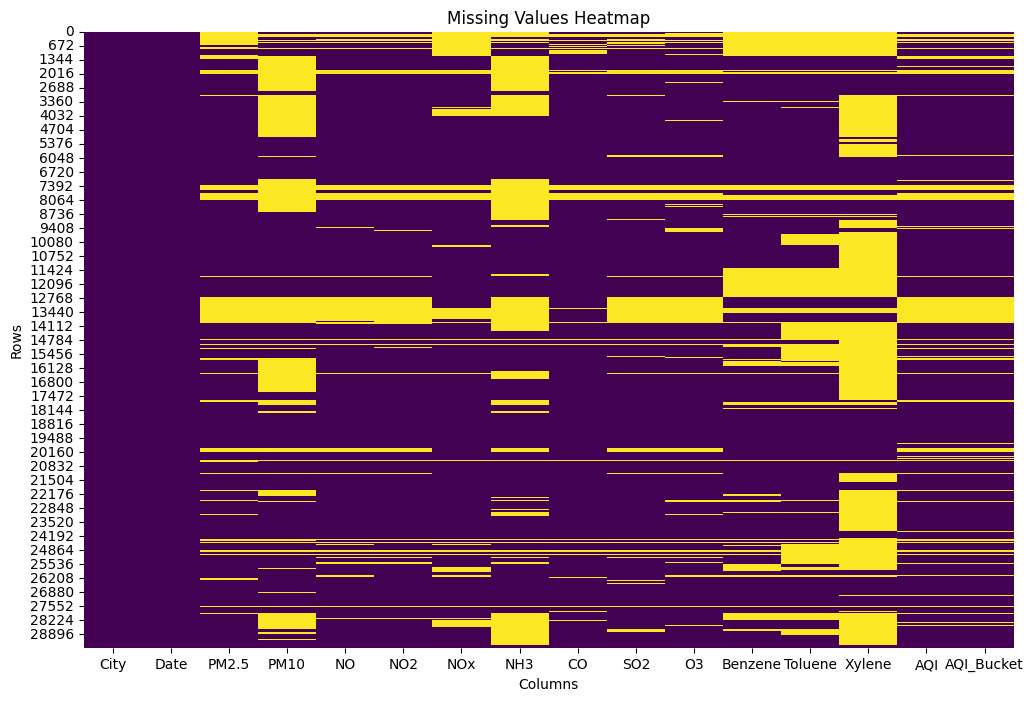

In [ ]:
# Visualising the missing values using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.xlabel('Columns')
plt.ylabel('Rows')
plt.show()

**Highlighting which cities have missing values**

In [ ]:
# Grouping the different cities to understand which cities have more missing values.
missing_values_per_city = df.groupby('City').apply(lambda x: x.isnull().sum())
missing_values_per_city

/tmp/ipython-input-2631406874.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  missing_values_per_city = df.groupby('City').apply(lambda x: x.isnull().sum())


,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
City,,,,,,,,,,,,,,,,
Ahmedabad,0,0,628,1602,609,608,594,2009,609,640,685,483,483,484,675,675
Aizawl,0,0,2,1,0,0,0,0,0,0,9,15,15,113,2,2
Amaravati,0,0,59,55,55,55,55,55,97,65,55,75,75,269,110,110
Amritsar,0,0,128,63,93,44,289,42,76,168,115,195,212,213,95,95
Bengaluru,0,0,146,360,6,6,4,203,11,6,144,266,93,2009,99,99
Bhopal,0,0,9,9,9,9,9,9,9,9,9,289,289,289,11,11
Brajrajnagar,0,0,185,173,243,234,175,226,150,193,203,173,938,938,225,225
Chandigarh,0,0,15,0,4,4,4,10,0,0,0,0,0,0,5,5
Chennai,0,0,117,1707,36,36,36,462,25,36,49,285,253,2009,125,125


The amount of missing data varies notably across cities. Several locations, such as Ahmedabad, Amaravati, Bengaluru, Bhopal, Chandigarh, Chennai, Coimbatore, Delhi, Ernakulam, Kochi, Kolkata, Shillong, and Thiruvananthapuram show very few missing values, mainly in the more sparsely recorded pollutants like NH3, Benzene, Toluene, and Xylene.

In contrast, a few cities stand out with substantially higher missing values across multiple pollutants. Gurugram, Jaipur, Jorapokhar, Lucknow, Mumbai, Patna, and Visakhapatnam consistently show large gaps. Particularly for PM10, NH3, Benzene, Toluene, and Xylene. With some pollutants missing hundreds or even thousands of entries.

Cities such as Guwahati and Jorapokhar also show missing values spread across nearly all pollutant columns, though at a smaller scale.

Overall, the distribution of missing values is not linked across cities, with a handful of locations contributing the majority of the missing pollutant data.

This suggests that any imputation or cleaning strategy should consider city-level patterns rather than applying a single global method.

In [ ]:
print("Total missing values per City:")
print(df.groupby('City').apply(lambda x: x.isnull().sum().sum()))

Total missing values per City:
City
Ahmedabad             10784
Aizawl                  159
Amaravati              1190
Amritsar               1828
Bengaluru              3452
Bhopal                  970
Brajrajnagar           4281
Chandigarh               47
Chennai                5301
Coimbatore              693
Delhi                  1087
Ernakulam               275
Gurugram               6843
Guwahati               1033
Hyderabad              1583
Jaipur                 1416
Jorapokhar             8603
Kochi                   356
Kolkata                 816
Lucknow                6082
Mumbai                14201
Patna                  6214
Shillong               1073
Talcher                4014
Thiruvananthapuram     3805
Visakhapatnam          2382
dtype: int64


/tmp/ipython-input-2279394426.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  print(df.groupby('City').apply(lambda x: x.isnull().sum().sum()))


The total number of missing values varies noticeably across the cities, indicating that some monitoring locations have more complete records than others. Mumbai (14,201 missing values) shows the largest amount of missing data, followed by Jorapokhar (8,603), Gurugram (6,843), Patna (6,214), and Lucknow (6,082), suggesting these stations experienced more frequent gaps in pollutant reporting. Possibly due to sensor downtime, maintenance issues, or inconsistent data transmission.

Several cities exhibit moderate levels of missing values, including Ahmedabad (10,784), Chennai (5,301), Brajrajnagar (4,281), Talcher (4,014), Thiruvananthapuram (3,805), and Bengaluru (3,452). These sites may have occasional interruptions but still provide substantial usable data.

In contrast, a number of cities show very few missing entries, indicating strong data consistency. Chandigarh (47 missing values), Aizawl (159), Ernakulam (275), Kochi (356), and Coimbatore (693) maintain highly complete datasets with minimal gaps.

Overall, the distribution of missing values suggests variability in data reliability across cities, with some stations recording pollutants consistently while others experience recurring lapses. These differences highlight the importance of considering city-level data quality when performing downstream analysis or designing imputation strategies.

# Handling Missing Values

In [ ]:
df[['PM2.5','PM10','NO','NO2','NOx','NH3','CO','SO2','O3','Benzene','Toluene','Xylene','AQI','AQI_Bucket']] = df[['PM2.5','PM10','NO','NO2','NOx','NH3','CO','SO2','O3','Benzene','Toluene','Xylene','AQI','AQI_Bucket']].ffill().bfill()

The forward-fill (ffill) technique is chosen because it works particularly well with time-series datasets such as air quality measurements, which are recorded in a continuous sequence. In these types of data, gaps typically arise from brief sensor outages or temporary transmission problems. By carrying the last available value forward, ffill preserves the natural flow of the time series and avoids introducing abrupt changes that could distort underlying trends. Compared with methods like mean imputation or interpolation, it ensures a smoother, more realistic progression of environmental readings. As a result, ffill provides a practical and reliable way to maintain consistency in the dataset.

In [ ]:
print("Total missing values per City:")
print(df.groupby('City').apply(lambda x: x.isnull().sum().sum()))

Total missing values per City:
City
Ahmedabad             0
Aizawl                0
Amaravati             0
Amritsar              0
Bengaluru             0
Bhopal                0
Brajrajnagar          0
Chandigarh            0
Chennai               0
Coimbatore            0
Delhi                 0
Ernakulam             0
Gurugram              0
Guwahati              0
Hyderabad             0
Jaipur                0
Jorapokhar            0
Kochi                 0
Kolkata               0
Lucknow               0
Mumbai                0
Patna                 0
Shillong              0
Talcher               0
Thiruvananthapuram    0
Visakhapatnam         0
dtype: int64


/tmp/ipython-input-2279394426.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  print(df.groupby('City').apply(lambda x: x.isnull().sum().sum()))


In [ ]:
# This function calculates the number and percentage of missing values in each column.
def missing_values_table(df):
    # Total missing values
    mis_val = df.isnull().sum()

    # Percentage of missing values
    mis_val_percent = 100 * mis_val / len(df)

    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)

    mis_val_table = mis_val_table.rename(columns={0: 'Missing Values', 1: '% of Total Values'})

    # Sort the table by percentage of missing descending
    mis_val_table = mis_val_table.sort_values('% of Total Values', ascending=False)

    return mis_val_table

missing_values = missing_values_table(df)
display(missing_values.style.background_gradient(cmap='Reds'))

,Missing Values,% of Total Values
City,0,0.000000
Date,0,0.000000
PM2.5,0,0.000000
PM10,0,0.000000
NO,0,0.000000
NO2,0,0.000000
NOx,0,0.000000
NH3,0,0.000000
CO,0,0.000000
SO2,0,0.000000


To address the missing values in the dataset, I applied the forward-fill (ffill) method, which is commonly used for time-series data such as air quality measurements. This approach replaces any missing entry with the most recent valid observation, ensuring the continuity of the data without introducing abrupt changes or unrealistic values. Since gaps in environmental datasets typically occur due to short-term sensor interruptions or transmission issues, ffill provides a practical and reliable way to maintain consistent trends over time. After applying this method across the relevant columns, all missing values were successfully filled, resulting in a complete dataset ready for further analysis.

Preparing the dataset for time-based and pollutant-based analysis. It begins by creating a copy of the original DataFrame to prevent accidental modification, then ensures the index is correctly formatted as a datetime object named Date. From this datetime index, the code extracts useful temporal features, including the year, numerical month, and month name, which supports trend analysis and seasonal comparisons. A custom function is then defined to map each month to one of India’s four seasons (Winter, Pre-monsoon, Monsoon, and Post-monsoon), and this classification is added to the dataset as a new Season column. Finally, a list of pollutant variables is defined, allowing these columns to be easily referenced later for visualisation, and machine-learning modelling.

In [ ]:
df = df.copy()  # avoiding modifying original

# Ensuring datetime index is correct
df.index.name = "Date"
df.index = pd.to_datetime(df.index)

# Adding temporal features
df["Year"] = df.index.year
df["Month"] = df.index.month
df["MonthName"] = df.index.month_name().str.slice(stop=3)

# Helper to convert month to Indian seasons
def month_to_season(m):
    if m in [12, 1, 2]:
        return "Winter"
    elif m in [3, 4, 5]:
        return "Pre-monsoon"
    elif m in [6, 7, 8, 9]:
        return "Monsoon"
    else:
        return "Post-monsoon"

df["Season"] = df["Month"].map(month_to_season)

# List of pollutant columns
pollutant_cols = [
    "PM2.5", "PM10", "NO", "NO2", "NOx",
    "NH3", "CO", "SO2", "O3", "Benzene", "Toluene", "Xylene"
]


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PM2.5,29531.0,68.083824,68.690230,0.04,25.65,46.63,83.690,949.99
PM10,29531.0,101.037179,82.147354,0.01,42.32,81.68,128.660,1000.00
NO,29531.0,16.988839,23.373251,0.02,5.21,9.33,18.670,390.68
NO2,29531.0,26.433722,24.035481,0.01,10.44,19.71,35.030,362.21
NOx,29531.0,33.667603,33.611004,0.00,13.47,24.18,39.320,467.63
NH3,29531.0,21.754000,26.202912,0.01,7.31,12.80,29.060,352.89
CO,29531.0,2.292728,6.824267,0.00,0.50,0.91,1.490,175.81
SO2,29531.0,15.672718,20.575580,0.01,5.76,8.98,15.850,193.86
O3,29531.0,33.509083,21.808986,0.01,18.67,29.39,44.215,257.73
Benzene,29531.0,3.131053,15.988244,0.00,0.06,0.68,2.750,455.03


**count** **(number of valid values)**

Every pollutant column shows 29,531 non-missing observations, meaning that after cleaning and imputation, each variable now has complete data across all records. This confirms that no missing values remain in the dataset.

**mean (average level of each pollutant)**

The mean row shows the typical concentration for each pollutant across all cities and timestamps. For example:

PM2.5 ≈ 68 µg/m³ → moderate particulate pollution on average.

PM10 ≈ 101 µg/m³ → slightly higher, consistent with coarse dust presence.

NO, NO2, and NOx have averages between 17–34 µg/m³, suggesting regular traffic or combustion-related emissions.

AQI ≈ 162, indicating that overall air quality tends to fall within the “Moderate” to “Unhealthy” range.

**min and max (range of observed values)**

These columns show the smallest and largest values recorded for each pollutant:

Several pollutants (e.g., PM10, PM2.5, Benzene, Toluene, Xylene) have minimum values near 0, meaning there were periods of very clean air.

The maximum values (e.g., PM2.5 up to 949, PM10 up to 1000, AQI up to 2049) reveal extreme pollution spikes, likely during specific events such as festivals, fires, industrial releases, or severe weather conditions trapping pollutants.

**Quartiles (25%, 50%, 75%) – distribution and spread of pollution levels**

These values divide the data into segments to show how pollutant levels vary:

50% (Median) shows the typical central value — for example, median PM2.5 = 46.6, meaning half of all measurements fall below this level.

75% values (e.g., PM10 = 128.7, NO2 = 35.0, O3 = 44.2) show that pollutant levels frequently rise well above their medians, indicating right-skewed distributions due to high pollution days.

The large difference between 25% and 75% suggests substantial variability in air quality across cities and time.

**std (Standard Deviation – how much values fluctuate)**

Most pollutants have high standard deviations relative to their means (e.g., PM2.5 std = 68.7; PM10 std = 82.1), showing that pollution levels change dramatically from hour to hour or between cities.
Lower std values (e.g., CO = 6.8) indicate more stable concentrations, except for occasional peaks.

**Overall Interpretation**

The dataset is now complete, with no missing values.

Pollution levels vary widely, with some cities or time periods experiencing very high concentrations.

The AQI distribution reflects a mix of moderate and high pollution days, consistent with urban environments across India.

# Data Analysis


**Importing libraries**

This section imports all the essential libraries needed to build and evaluate machine-learning models for air-quality prediction. It includes tools for splitting the dataset into training and testing sets, encoding categorical labels, and calculating performance metrics such as accuracy, mean absolute error, and the confusion matrix. The Random Forest algorithms used for both regression and classification are also imported here. Additionally, the code imports Plotly's visualisation interface and sets a clean modern theme (plotly_white) to ensure all graphs have a consistent and professional appearance.

In [ ]:
# Importing libraries to create the machine learning tool
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import (
    mean_absolute_error, r2_score,
    accuracy_score, classification_report, confusion_matrix
)
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier

# Importing other libraries that will help with the visualisations
import plotly.io as pio

# Setting a clean, modern theme for the visualisations
pio.templates.default = "plotly_white"

**Average pollution by city**

This code calculates and visualises the average concentration of key pollutants for each city. It begins by grouping the dataset by city and computing the mean levels of major pollutants such as PM2.5, PM10, SO₂, NO₂, CO, and O₃. The data is then reshaped into a long format using melt, creating a single “Pollutant” column that makes it easier to plot multiple pollutants together. Finally, a stacked bar chart is generated using Plotly Express, where each bar represents a city and the coloured segments show the contribution of each pollutant to the overall pollution profile. This visualisation allows for quick comparison of pollutant composition across different cities.

In [ ]:
city_stats = df.groupby('City')[['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']].mean().reset_index()

import plotly.express as px

# Melt the DataFrame to create a 'Pollutant' column
city_stats_melted = pd.melt(city_stats,
                               id_vars=['City'],
                               value_vars=['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3'],
                               var_name='Pollutant',
                               value_name='Average Concentration')

# Create the stacked bar chart
fig_city = px.bar(city_stats_melted,
                     x='City',
                     y='Average Concentration',
                     color='Pollutant', # Use 'Pollutant' for color differentiation
                     title='Average Pollution Levels by City (Stacked)',
                     labels={'City': 'Cities', 'Average Concentration': 'Average Concentration'},
                     barmode='stack')

fig_city.show()

**Inference**

---



Cities such as Mumbai, Jorapokhar, Ahmedabad, and Patna exhibit notably high pollution levels, driven largely by elevated concentrations of particulate matter. In contrast, cities like Aizawl, Ernakulam, Kochi, Shillong, and Thiruvananthapuram show comparatively cleaner air profiles. Across all cities, PM2.5 and PM10 consistently account for the largest share of total pollution, highlighting the widespread influence of particulate matter on overall air quality.

# Identifying Trends

**National AQI Trend 2015–2020**

---

This code calculates and visualises the monthly trend of air quality across India. It begins by resampling the AQI data to a monthly frequency and computing the average AQI for each month, giving a national-level view of how air quality changes over time. The resulting data is then plotted using Plotly Express to create an interactive line chart, with markers highlighting each monthly value. The chart displays the progression of India’s mean AQI from 2015 to 2020, allowing clear identification of long-term patterns, spikes, or seasonal variations in air quality.

In [ ]:
# Computing national monthly average AQI
aqi_monthly = df["AQI"].resample("ME").mean().reset_index()

# Plotting interactive monthly line chart
fig = px.line(
    aqi_monthly,
    x="Date",
    y="AQI",
    title="India – Monthly Mean AQI (2015–2020)",
    markers=True
)
fig.update_layout(xaxis_title="Year", yaxis_title="AQI")
fig.show()


**Inference**

---

The graph clearly shows that monthly mean AQI tends to peak during the winter months, when atmospheric conditions and increased emissions contribute to poorer air quality. In contrast, the lowest AQI values occur during the monsoon season (June–September), when rainfall and stronger winds help disperse pollutants more effectively. A notable exception in the overall trend is the significant drop in AQI observed in 2020, reflecting the impact of COVID-19, which temporarily reduced industrial activity, transportation, and other major pollution sources.


**City-level AQI Trends**

---

This code calculates and visualises monthly AQI trends for each city in the dataset. It first groups the data by city and resamples it to a monthly frequency, computing the average AQI for each city-month combination. The resulting data is then plotted using Plotly Express as a multi-line time series, where each line represents a different city. This allows easy comparison of how air quality changes over time across different urban and industrial regions, highlighting cities with consistently higher or lower pollution levels and revealing seasonal or long-term patterns.

In [ ]:
# Grouping by city and month
city_monthly = df.groupby("City")["AQI"].resample("ME").mean().reset_index()

# Plotting multi-city time series
fig = px.line(
    city_monthly,
    x="Date",
    y="AQI",
    color="City",
    title="Monthly Mean AQI by City",
    line_group="City",
    hover_name="City"
)
fig.show()


**Inference**

---

This graph illustrates the monthly mean AQI trends for every city in the dataset from 2015 to 2020. A repeating seasonal pattern is visible across nearly all cities, with AQI values increasing sharply during the winter months and dropping significantly during the monsoon season due to improved atmospheric dispersion. While most cities follow a similar seasonal cycle, the graph highlights significant variation in pollution severity between regions. For example, Ahmedabad consistently shows much higher AQI levels than other cities, with several extreme spikes over the years. In contrast, cities such as Aizawl, Kochi, Ernakulam, and Shillong remain at the lower end of the AQI scale throughout the 5 year period. Overall, the graph demonstrates both the strong seasonal influence on air quality across India and the substantial geographic differences in pollution intensity between cities.


**Seasonal Patterns in AQI**

---
This code calculates the average AQI for each month across all cities and all years in the dataset to reveal broad seasonal air-quality patterns. It groups the data by month, computes the mean AQI for each group, and then plots the results using Plotly as a simple line chart with markers highlighting each monthly value. By displaying AQI values from January through December, the graph makes it easy to identify recurring seasonal trends—such as higher pollution during winter months and lower levels during the monsoon season.


In [ ]:
# Computing the mean AQI for each month across all years
month_aqi = df.groupby("Month")["AQI"].mean().reset_index()

# Plotting clean line chart of AQI by month
fig = px.line(
    month_aqi,
    x="Month",
    y="AQI",
    title="Mean AQI by Month",
    markers=True
)
fig.update_xaxes(dtick=1)
fig.show()


**Inference**

---
This graph shows that air quality is at its worst during the winter months (October - January), where AQI levels rise noticeably. In contrast, the summer and monsoon months see much cleaner air, with AQI dropping to its lowest levels of the year.


**Seasonal Averages for Pollutants**

---

This code calculates how average pollutant levels change across India’s four main seasons. It first groups the dataset by the Season column and computes the mean value of each pollutant within each season. The seasons are then reordered into a logical sequence, Winter, Pre-monsoon, Monsoon, and Post-monsoon to make the results easier to interpret. Finally, a heatmap is created using Plotly to visually compare seasonal pollutant levels, with darker or lighter colours showing how concentrations rise or fall throughout the year. This gives a clear overview of which pollutants are more dominant in each season.

In [ ]:
# Average pollutants by Indian season
season_pollutants = df.groupby("Season")[pollutant_cols].mean()

# Re-ordering seasons logically
season_pollutants = season_pollutants.loc[
    ["Winter", "Pre-monsoon", "Monsoon", "Post-monsoon"]
]

# Heatmap of seasonal pollutant behaviour
fig = px.imshow(
    season_pollutants,
    labels=dict(x="Pollutant", y="Season", color="Mean Level"),
    title="Seasonal Mean Pollutant Levels"
)
fig.update_xaxes(side="top")
fig.show()


**Inference**

---

This heatmap highlights how average pollutant levels vary across India’s different seasons. Overall, pollutant concentrations, especially PM2.5 and PM10 are highest in the winter, making it the most polluted season. Levels drop noticeably during the pre-monsoon, and reach their lowest point during the monsoon, when rainfall helps clean the air. In the post-monsoon season, pollutant levels rise again, though not as sharply as in winter. Across all seasons, PM2.5 and PM10 consistently appear as the dominant pollutants, while gases such as NO, NH3, CO, Benzene, Toluene, and Xylene remain comparatively lower.

# Relationships between pollutants

**Correlation Matrix**

---

This code calculates how strongly each pollutant is related to every other pollutant and to the overall Air Quality Index (AQI). It first selects all pollutant variables along with AQI, computes their correlation values, and then displays the results in an interactive heatmap. In the heatmap, colours represent the strength and direction of the relationships: darker reds indicate strong positive correlations (pollutants that rise together), while darker blues indicate strong negative correlations. This visual helps identify which pollutants tend to behave similarly, which ones are independent, and which pollutants have the strongest influence on AQI.

In [ ]:
# Computing the correlation between pollutants and AQI
corr_cols = pollutant_cols + ["AQI"]
corr_matrix = df[corr_cols].corr()

# Plotting an interactive heatmap
fig = px.imshow(
    corr_matrix,
    color_continuous_scale="RdBu",
    color_continuous_midpoint=0,
    title="Correlation Matrix – Pollutants & AQI"
)
fig.update_xaxes(side="top")
fig.show()


**Inference**

---

The correlation matrix shows that PM2.5 and PM10 have the strongest positive relationship with AQI, meaning they are the biggest contributors to poor air quality. NO, NO₂, and NOx also show moderate correlations with AQI and with each other, reflecting their common emission sources. In contrast, pollutants like benzene, toluene, xylene, and CO display weak correlations, indicating they vary more independently. Overall, particulate matter stands out as the main driver of changes in AQI.

**Pollutants Most Strongly Associated With AQI**

---

This code identifies which pollutants are most strongly linked to AQI. It begins by extracting the correlation values between AQI and every pollutant, then sorts them from highest to lowest. AQI is then removed from the list to keep only pollutant correlations. The results are placed into a clean DataFrame with two columns (Pollutant and Correlation) making it easy to work with. Finally, a bar chart is created using Plotly to visually show how strongly each pollutant correlates with AQI, helping to highlight which pollutants have the greatest impact on overall air quality.

In [ ]:
# Extracting correlation with AQI only
aqi_corr = corr_matrix["AQI"].sort_values(ascending=False)

# Dropping AQI itself
aqi_corr_df = aqi_corr.drop("AQI").reset_index()
aqi_corr_df.columns = ["Pollutant", "Correlation"]

# Bar chart
fig = px.bar(
    aqi_corr_df,
    x="Pollutant",
    y="Correlation",
    title="Correlation of Pollutants with AQI"
)
fig.show()


**Inference**

---

The bar chart shows how strongly each pollutant is correlated with AQI, indicating which pollutants have the biggest impact on overall air quality. CO has the highest correlation with AQI, followed closely by PM2.5, making these the strongest contributors to poor air quality in the dataset. NO₂, PM10, and SO₂ also show moderate positive correlations, suggesting they play a meaningful but slightly smaller role. Pollutants like NO, NOx, Toluene, and O₃ have weaker correlations, while Xylene, NH₃, and especially Benzene show the lowest correlations with AQI. Overall, the results highlight that particulate matter (PM2.5 and PM10) and combustion-related gases (CO and NO₂) are the most influential pollutants driving changes in AQI across the cities studied.

# Geographic Variation

**City-Level AQI Statistics**

---

This code computes key summary statistics for AQI in each city and visualises how average air quality compares across locations. It groups the dataset by city and calculates the mean, median, maximum AQI, and the number of recorded observations for each one. The cities are then sorted from highest to lowest mean AQI, making it easy to identify the most polluted locations. Finally, a bar chart is generated using Plotly, showing the mean AQI for every city, with additional statistics (median, max, and data count) available when hovering over each bar. This provides a quick and informative overview of how air quality varies geographically.

In [ ]:
# Calculating basic statistics for AQI by city
city_aqi_stats = df.groupby("City")["AQI"].agg(["mean", "median", "max", "count"])
city_aqi_stats = city_aqi_stats.sort_values("mean", ascending=False)

# Plotting mean AQI by city
fig = px.bar(
    city_aqi_stats.reset_index(),
    x="City",
    y="mean",
    hover_data=["median", "max", "count"],
    title="Mean AQI by City (2015–2020)"
)
fig.show()


**Inference**

---

The bar chart reveals clear differences in average air quality across Indian cities from 2015 to 2020. Ahmedabad stands out as the most polluted city, with the highest mean AQI by a significant margin, followed by Delhi, Patna, and Gurugram. These cities consistently experience poor air quality, often falling into unhealthy AQI ranges. In contrast, cities such as Aizawl, Shillong, Mumbai, Coimbatore, and Thiruvananthapuram have much lower mean AQI values, indicating relatively cleaner air over the same period. Overall, the results highlight a strong geographic divide in pollution levels, with northern and industrial regions showing far worse air quality than southern and northeastern cities.

**AQI Bucket Distribution by City**

---

This code analyses how often each city falls into different AQI categories (such as Good, Moderate, Poor, etc.). It first counts how many days each city spent in each AQI category using a pivot table. These counts are then converted into proportions so that each city’s results reflect percentages rather than raw numbers. The data is reshaped into a tidy format suitable for plotting, and finally a stacked bar chart is generated using Plotly. Each bar represents a city, and the coloured segments show the share of time spent in each AQI category. This visualisation makes it easy to compare overall air-quality profiles across cities and identify which ones consistently experience cleaner or more polluted air.

In [ ]:
# Computing the count of AQI categories per city
city_bucket_counts = df.pivot_table(
    index="City",
    columns="AQI_Bucket",
    values="AQI",
    aggfunc="count",
    fill_value=0
)

# Converting to % proportions
city_bucket_pct = city_bucket_counts.div(city_bucket_counts.sum(axis=1), axis=0)

# Converting to clean up the format for Plotly
city_bucket_pct_reset = city_bucket_pct.reset_index().melt(
    id_vars="City",
    var_name="AQI_Bucket",
    value_name="Proportion"
)

# Creating a stacked bar chart
fig = px.bar(
    city_bucket_pct_reset,
    x="City",
    y="Proportion",
    color="AQI_Bucket",
    barmode="stack",
    title="Proportion of AQI Categories by City"
)
fig.show()


**Inference**

---

This chart compares how often each city experiences different AQI categories. Cities like Ahmedabad, Delhi, Patna, and Gurugram show a high proportion of Poor, Very Poor, and Severe air-quality days, indicating consistently unhealthy conditions. In contrast, cities such as Aizawl, Shillong, Kochi, Ernakulam, and Thiruvananthapuram show a much larger share of Good and Satisfactory days, reflecting cleaner and more stable air quality. Many mid-range cities—such as Bengaluru, Hyderabad, Chennai, and Guwahati—tend to fall mostly within the Moderate and Satisfactory categories, showing neither extreme pollution nor consistently clean air.

**Urban vs Industrial Regions**

---

This code categorises each city into one of three region types. Urban, Industrial, or Urban-Industrial—based on known economic and environmental characteristics such as population density, industrial activity, and the presence of mining or manufacturing sectors. It then adds this classification to the dataset and calculates the average levels of all major pollutants (including AQI) for each region type. Finally, it visualises these differences using a heatmap, allowing easy comparison of pollution profiles across urban, industrial, and mixed regions. This helps reveal how pollution levels vary depending on the nature of the region, highlighting whether industrial areas consistently show higher pollutant concentrations compared to urban regions.

In [64]:
# Manual mapping
city_type_map = {
    # Major metro urban centres
    "Delhi": "Urban",
    "Mumbai": "Urban",
    "Bengaluru": "Urban",
    "Chennai": "Urban",
    "Hyderabad": "Urban",
    "Kolkata": "Urban",
    "Lucknow": "Urban",
    "Jaipur": "Urban",
    "Bhopal": "Urban",
    "Chandigarh": "Urban",
    "Thiruvananthapuram": "Urban",
    "Coimbatore": "Urban",
    "Ernakulam": "Urban",
    "Kochi": "Urban",
    "Aizawl": "Urban",
    "Shillong": "Urban",
    "Guwahati": "Urban",
    "Visakhapatnam": "Urban-Industrial",  # Large port and industrial

    # Strong industrial areas
    "Ahmedabad": "Industrial",           # Textiles, chemicals, manufacturing
    "Patna": "Industrial",               # Growing industrial zones
    "Gurugram": "Urban-Industrial",      # Automotive + corporate hub
    "Amritsar": "Urban-Industrial",       # Food processing, light manufacturing

    # Coal/mining/heavy industry areas
    "Jorapokhar": "Industrial",          # Coalfield
    "Talcher": "Industrial",             # Thermal power and coal mining
    "Brajrajnagar": "Industrial",        # MCL coal mining and paper mills
}


# Adding region type column
df["RegionType"] = df["City"].map(city_type_map)

# Mean pollutant levels by region type
region_pollutants = df.groupby("RegionType")[pollutant_cols + ["AQI"]].mean()

# Heatmap comparison
fig = px.imshow(
    region_pollutants,
    labels=dict(x="Pollutant", y="Region Type", color="Mean Level"),
    title="Pollution Levels by Region Type"
)
fig.update_xaxes(side="top")
fig.show()


**Inference**

---

The heatmap compares average pollutant levels across three region types: Industrial, Urban, and Urban-Industrial areas. The results show that Industrial regions have the highest concentrations of pollutants—especially PM2.5 and PM10, which is reflected in their significantly elevated AQI values. Urban-Industrial regions also show relatively high pollutant levels, sitting between the purely industrial and purely urban areas. In contrast, Urban regions consistently have the lowest pollutant concentrations across most pollutants, resulting in much lower average AQI. Overall, the heatmap highlights a clear pattern: pollution levels are highest in areas dominated by heavy industry and mining, moderate in mixed economic zones, and lowest in primarily residential or metropolitan urban areas.

# Predicting Air Quality (Machine Learning)

In this part of the analysis, the goal is to use machine learning to predict air quality based on the levels of different pollutants. By training a Random Forest Regressor, a model that builds and combines many decision trees, we aim to estimate the Air Quality Index (AQI) directly from pollutant concentrations such as PM2.5, PM10, NO₂, and CO. This approach allows us to understand how well AQI can be predicted from raw pollutant data and which pollutants are most influential in driving those predictions. Ultimately, the model provides a data-driven way to anticipate changes in air quality and supports deeper insight into the factors that contribute most to pollution levels across cities.

Random Forest is a strong choice for predicting AQI because it handles complex, real-world environmental data extremely well. Air pollution patterns are influenced by many interacting pollutants, and Random Forest models can capture these nonlinear relationships far better than simpler methods. Another key advantage is that Random Forest provides feature importance scores, allowing us to clearly identify which pollutants contribute most to AQI predictions. This makes the model not only accurate, but also interpretable—ideal for understanding and forecasting air quality across different cities and seasons.

**Train–Test Split**

---

This code prepares the dataset for two separate machine-learning tasks: predicting numerical AQI (regression) and predicting AQI categories (classification). First, it selects all pollutant columns as the model inputs (X) and uses the AQI column as the regression target (y_reg). The data is then split into training and testing sets, with 80% used for training the model and 20% reserved for evaluating its performance. For the classification task, the AQI categories (e.g., Good, Moderate, Poor) are converted into numerical labels using a LabelEncoder, creating a new target variable (y_clf). This labelled data is again split into training and testing sets, but with stratification to ensure that all AQI categories are represented proportionally. Overall, this code sets up the necessary inputs for both regression and classification models to be trained effectively.

In [ ]:
# Inputs = pollutant values
X = df[pollutant_cols]
y_reg = df["AQI"]

# Regression split
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X, y_reg, test_size=0.2, random_state=42
)

# Encoding AQI buckets for classification
le = LabelEncoder()
df["AQI_Bucket_Label"] = le.fit_transform(df["AQI_Bucket"])

y_clf = df["AQI_Bucket_Label"]

# Classification split
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(
    X, y_clf, test_size=0.2, random_state=42, stratify=y_clf
)


**Training random forest regressor**

---

This code builds and evaluates a Random Forest Regression model to predict AQI based on pollutant levels. First, it creates the model using 300 decision trees (n_estimators=300), ensuring consistent results with a fixed random seed and enabling parallel processing for speed (n_jobs=-1). The model is then trained using the training data, learning the relationship between pollutant concentrations (X_train_reg) and AQI values (y_train_reg). Once trained, it generates predictions for the test set, allowing us to assess how well the model performs on unseen data. The code concludes by printing two key performance metrics: Mean Absolute Error (MAE), which measures how far predictions are from actual AQI values on average, and R², which indicates how much of the variation in AQI the model can explain. Together, these metrics show the model’s accuracy and overall effectiveness.

In [ ]:
# Creating the model
rf_reg = RandomForestRegressor(
    n_estimators=300,
    random_state=42,
    n_jobs=-1
)

# Fitting model to the training data
rf_reg.fit(X_train_reg, y_train_reg)

# Predict on test set
y_pred_reg = rf_reg.predict(X_test_reg)

print("Regression MAE:", mean_absolute_error(y_test_reg, y_pred_reg))
print("Regression R²:", r2_score(y_test_reg, y_pred_reg))


Regression MAE: 19.403707713287893
Regression R²: 0.9168371817654134


**Regression Feature Importance (Plotly)**

---

This code identifies which pollutants have the greatest influence on the Random Forest Regression model’s AQI predictions. After the model is trained, it extracts the feature importance values, numbers that indicate how much each pollutant contributed to the model’s decision-making. These importance scores are organised into a Pandas Series, sorted from highest to lowest to highlight the most impactful pollutants. Finally, the results are visualised in a Plotly bar chart, showing each pollutant’s relative importance. This helps reveal which pollutants play the biggest role in determining AQI within the dataset.

In [ ]:
# After training rf_reg
reg_importances = pd.Series(rf_reg.feature_importances_, index=pollutant_cols)
reg_importances = reg_importances.sort_values(ascending=False)

# Plot
fig = px.bar(
    reg_importances.reset_index(),
    x="index",
    y=0,
    title="Feature Importance – AQI Regression",
    labels={"index": "Pollutant", "0": "Importance"}
)
fig.show()


**Inference**

---

The feature importance chart reveals that PM2.5 and CO are by far the most influential pollutants in the Random Forest model’s ability to predict AQI. PM2.5 contributes over half of the model’s predictive power, making it the strongest single driver of air-quality levels in the dataset. CO is the second most important pollutant, also playing a major role. In contrast, all other pollutants, such as PM10, NO, O₃, NO₂, and SO₂ have much smaller importance values, indicating that they contribute relatively little to the model’s predictions. The remaining pollutants (Toluene, Xylene, Benzene, NH₃) have almost negligible impact. Overall, the results show that AQI in these cities is dominated primarily by fine particulate matter (PM2.5) and carbon monoxide, with other pollutants playing only minor roles in comparison.

**Training the random forest classifier**

---

This code builds and evaluates a Random Forest Classifier to predict AQI categories (such as Good, Moderate, Poor, etc.) based on pollutant levels. The model is created using 400 decision trees, with "class_weight='balanced'" ensuring that all AQI categories, especially the less frequent ones, are treated fairly during training. After the classifier is trained on the training data, it predicts the AQI category for the test set. The performance of these predictions is then assessed by printing the overall accuracy and a detailed classification report, which includes precision, recall, and F1-scores for each AQI category. This allows us to see how well the model distinguishes between different levels of air quality and whether certain categories are harder to predict than others.

In [ ]:
rf_clf = RandomForestClassifier(
    n_estimators=400,
    random_state=42,
    class_weight="balanced",
    n_jobs=-1
)

# Fitting the classifier
rf_clf.fit(X_train_clf, y_train_clf)

# Predicting AQI categories
y_pred_clf = rf_clf.predict(X_test_clf)

# Printing accuracy and classification report
print("Classifier Accuracy:", accuracy_score(y_test_clf, y_pred_clf))
print("\nClassification Report:")
print(classification_report(y_test_clf, y_pred_clf, target_names=le.classes_))


Classifier Accuracy: 0.8317250719485356

Classification Report:
              precision    recall  f1-score   support

        Good       0.93      0.83      0.87       582
    Moderate       0.82      0.86      0.84      1945
        Poor       0.75      0.67      0.70       622
Satisfactory       0.85      0.87      0.86      1872
      Severe       0.85      0.82      0.83       282
   Very Poor       0.82      0.82      0.82       604

    accuracy                           0.83      5907
   macro avg       0.83      0.81      0.82      5907
weighted avg       0.83      0.83      0.83      5907



**Inference**

---

The Random Forest classifier achieves an overall accuracy of 83%, meaning it correctly predicts the AQI category for the majority of test samples. Performance varies slightly across categories, but all classes achieve solid precision, recall, and F1-scores. The model performs strongest on the Good, Satisfactory, and Moderate categories, with F1-scores between 0.84 and 0.87, reflecting reliable classification of common air-quality conditions. The Poor, Severe, and Very Poor categories show slightly lower scores especially Poor, with an F1-score of 0.70 likely because these categories are less frequent and harder to distinguish. Overall, the results show that the model is highly effective at predicting AQI categories and manages to classify even the more severe pollution levels with reasonable accuracy.

**Classification Confusion Matrix + Feature Importance**


---
This code provides two key insights into the performance and behaviour of the AQI classification model. First, it generates a confusion matrix, which shows how often each AQI category was correctly predicted versus how often the model misclassified it. The matrix is displayed as a labelled heatmap, making it easy to see which categories the model distinguishes well and where errors occur. Second, the code calculates the feature importance values from the Random Forest classifier, showing which pollutants contribute most to determining the predicted AQI category. These importance scores are then visualised in a bar chart. Together, the confusion matrix and feature importance plots help evaluate how reliable the classifier is and which pollutants have the greatest influence on its decisions.

In [ ]:
# Confusion matrix
cm = confusion_matrix(y_test_clf, y_pred_clf)

# Heatmap with labels
fig = px.imshow(
    cm,
    x=le.classes_,
    y=le.classes_,
    text_auto=True,
    labels=dict(x="Predicted", y="Actual", color="Count"),
    title="Confusion Matrix – AQI Categories"
)
fig.update_yaxes(autorange="reversed")
fig.show()

# Feature importance
clf_importances = pd.Series(rf_clf.feature_importances_, index=pollutant_cols)
clf_importances = clf_importances.sort_values(ascending=False)

fig = px.bar(
    clf_importances.reset_index(),
    x="index",
    y=0,
    title="Feature Importance – AQI Category Classification",
    labels={"index": "Pollutant", "0": "Importance"}
)
fig.show()


**Inference**

---

The confusion matrix shows that the classifier performs very well across most AQI categories. The largest counts lie along the diagonal, meaning the model correctly predicts the true category in most cases. Moderate and Satisfactory categories are especially well classified, with 1,672 and 1,621 correct predictions respectively. The Good category also has strong performance, with 481 correct predictions and relatively few misclassifications.

Some confusion occurs between neighbouring categories, which is expected given how similar air-quality levels can be. For example, some Moderate days are misclassified as Satisfactory, and some Poor days are mistaken for Very Poor or Moderate. The model also predicts Severe and Very Poor categories reasonably well, though these categories show slightly higher misclassification rates due to their smaller sample sizes.

Overall, the results demonstrate that the model can reliably distinguish between different AQI categories, with most errors occurring between adjacent levels rather than across distant categories.

The feature importance chart shows which pollutants the classifier relied on most when predicting AQI categories. PM2.5 is the strongest driver, followed by CO and PM10, while the remaining pollutants have much smaller influence. This confirms that particulate matter and combustion gases are the key factors shaping AQI classifications.